## Neural Networks

Origins: Algorithms that try to mimic the brain.

<img align="left" src="./images/neural_network/neural_network_signal_flow.jpg" style=" width: 60%; padding-right: 20px ">

The diagram on the left shows how a biological neurons in the brain works. A biological neural network comprises of neurons connected to each other. A neuron takes the input impulses through its dendrites and after some processing it then sends electric impulses to other neurons via the output wire (i.e. the axon). This output electrical impulses then becomes the input to another neuron. 

The artificial neural network uses a very simplified Mathematical model of what a biological neuron does. An artificial neuron takes some inputs, one or more inputs, which are just numbers, does some computation and then outputs some other number, which then could be an input to a second neuron. When implementing the neural network instead of using one neuron at a time, we often want to simulate many such neurons at the same time. These neurons do collectively takes input a few numbers, carry out some computation, and output some other numbers which can be used by the other neurons as inputs.

> We do not completely know how the brain actually works. The neural network model just tries to implement a simple algorithm using neurons.

**Examples:**
- Speech Recognition
- Image processing
- Text (NLP)

### Why Neural Networks?

<img align="left" src="./images/neural_network/data_vs_performance_graph.jpg" style=" width: 60%; padding-right: 20px ">

We know that the amount of digital data has exploded during recent times. The traditional machine learning algorithms like linear regression, logistic regression, etc weren't able to scale with the amount of data we could now feed it and they weren't able to take effective advantage of all this data we had for different applications. So the AI researchers started training the neural networks on this dataset and found that by increasing the neural networks we were getting increase performance which was not possible using traditional algorithms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

np.set_printoptions(suppress = True)
from utils.load_data import load_coffee_data, load_digits_data

In [2]:
custom_round = np.vectorize(lambda x: 0 if x <= 0.5 else 1)

### How Neural Network works?

**Problem Statement:**

Let us take an example of demand prediction. We want to predict whether a T-Shirt will be a top seller or not?
We have a data where we are provided with price of TShirt and output Yes or No which states whether it was a top seller or not.

In tradition way, we can apply the logistic regression function to predict the output.

<img align="left" src="./images/neural_network/one_neuron_example.jpg" style=" width: 60%; padding-right: 40px ">

In neural network we add a neuron which will take the input feature X that is the price and compute the logistic regression function (in neural network it is known as the **activation function** denoted as **'a'**) and provide the output Y (0 <= Y <= 1) stating the T-Shirt is topseller or not.

$$f(x) = \frac{1}{1 + e^{-(wx + b)}}$$

where,
- x = Input feature i.e. price of T-Shirt

In [3]:
# Implementation

X = np.array([[100], [200]])
y = np.array([0, 1])

layer_1 = Dense(units=1, activation = 'sigmoid', name='L1')
a = layer_1(X)
print("Predictions: \n", custom_round(a))

Predictions: 
 [[1]
 [1]]



The above explains how a neural network with a single neuron is implemented

Let's consider a more complex neural network. In this case, we assume we have more input features i.e. price of the tshirt, shipping cost, material of which the tshirt is made and marketing of the tshirt. 

<img align="left" src="./images/neural_network/multiple_neuron_example.jpg" style=" width: 60%; padding-right: 40px ">

In order to determine if the TShirt can be a top seller we can think of the below factors
- **Affordability**: Can be determined by sum of price and shipping cost
- **Awareness**: How much marketing has been done for the TShirt
- **Perceived quality**: Determined by the price and material quality of the TShirt

In this case we can create three neurons to determine the above factors using the input features . All the features are passed to these three neurons each and the neuron will apply some activation function and return some output creating some sort of relationship features from the inputs.

These output relationship of the three neurons then can be passed to new neuron which will compute some activation function and predict whether the TShirt will be a top seller or not.

In this example we created a neural network with multiple layers,
- Layer 0 i.e. the input features **X**
- First layer computes the three factors (Affordability, Awareness, Perceived quality) using the input features **X**
- Second layer takes the factors and return the output **y i.e. (1/0)** Probability of being a top seller

> **Terminology**
> - Input Layer: it comprises of input features X
> - Output Layer: The layer that returns the final prediction
> - Hidden Layer: All the layers between input and output layers. These output is not available in the training set and hence know as hidden layer

> **Notes**
> - We don't need to manually determine the factors as stated in the above example. The neural network automatically compute the factors based on the number of neurons in each layer
> - We can have multiple layers in the hidden layer containing multiple neurons in each layer. We will have to choose these numbers depending upon the architecture of the neural network
> - There can be multiple neurons in the output layer depending on the output features

In [4]:
# Implementation

X = np.array([[100.0, 20.0, 0.1, 1], [200.0, 0.0, 0.8, 2]])
y = np.array([0, 1])

layer_1 = Dense(units=3, activation = 'sigmoid', name='L1')
a1 = layer_1(X)
layer_2 = Dense(units=1, activation = 'sigmoid', name='L2')
a = layer_2(a1)
print("Predictions: \n", custom_round(a))

Predictions: 
 [[0]
 [0]]


### Neural network layer

Let us take an example of Neural Network with 2 layer with 3 and 1 neurons each (excluding the input layer 0)

- For the first layer

$$
X => a^{[0]} => \begin{cases}
a_{1}^{[1]} = g(w_{1}^{[1]}a^{[0]} + b_{1}^{[1]}) \\
a_{2}^{[1]} = g(w_{2}^{[1]}a^{[0]} + b_{2}^{[1]}) \\
a_{3}^{[1]} = g(w_{3}^{[1]}a^{[0]} + b_{3}^{[1]}) \\
\end{cases}
=> [a_{1}^{[1]}, a_{2}^{[1]}, a_{3}^{[1]}]
=> a^{[1]}
$$

<img src="./images/neural_network/neural_network_first_layer.jpg" style=" width: 60% ">

- For the second layer

$$
a^{[1]} => \begin{cases}
a_{1}^{[2]} = g(w_{1}^{[2]}a^{[0]} + b_{1}^{[2]}) \\
\end{cases}
=> [a_{1}^{[2]}]
=> a^{[2]}
$$

where,

$$ g(z) = \frac{1}{1 + e^{-(z)}}$$

<img src="./images/neural_network/neural_network_second_layer.jpg" style=" width: 60% ">

After we have received the $a^{[2]}$, in case of binary classification we can use some threshold to determine the output classes.

So to summarize, every layer in a neural network takes an input vector of number and applies a bunch of activation function (in the above case logistic regression) units to it, and then computes another vector of numbers that then gets passed from layer to layer until we get to the final output layers computation which is basically the prediction of the neural network.

> This computation goes from left to right, we start from X and compute a1, then a2, and so on therfore this algorithm is also called **Forward Propagation** because we're propagating the activations of the neurons. So we're making these computations in the forward direction from left to right.

For any complex neural network, the activation of any neuron **j** of layer **l** can be determined as below equation:

$$a_{j}^{[l]} = g(w_{j}^{[l]}a^{[l-1]} + b_{j}^{[l]})$$

## Coffee Roasting

Given the input features temperature and time period for which the coffee is roasted, the model has to predict if the coffee will be of good quality or bad quality

In [5]:
X, y = load_coffee_data()

# Scaling the feature X using StandardScaler
from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()
X = scale_X.fit_transform(X)

### Custom Implementation

In [6]:
def my_dense(a_in, W, b):
    """
    Creating layer for a neural network and using the W and b weights
    Arguments:
        a_in (matrix) => Input activations
        W (matrix) => (number of activations x number of units)
        b (vector) => (number of units)
    Output:
        a_out => Activations from the layer for each neuron combined as vector
    """
    units = W.shape[1]
    a_out = np.zeros(units)
    for i in range(units):
        z = np.dot(a_in, W[:, i]) + b[i]
        sig = 1 / (1 + np.exp(-1 * z))
        a_out[i] = sig
    return a_out

def my_sequential(X, W_arr, b_arr):
    """
    Creating sequence of layers for prediction
    Arguments:
        X => Input feature X
        W_arr => number of layers x (W for each layer)
        b_arr => number of layers x (b for each layer)
    """
    layers = len(W_arr)
    activations = X
    for i in range(layers):
        activations = my_dense(activations, W_arr[i], b_arr[i])
    return activations

In [7]:
def my_coffee_roasting_model(X_in):
    m = X_in.shape[0]
    y_pred = np.zeros(m)
    W = [
        np.array([[5.8416753, 7.436475 , 4.87974  ], [1.3628774, 2.6089027, 6.1303945]]), # W for Layer 1 (number of features (i.e. 2) x number of units in layer(i.e. 3))
        np.array([[ 6.7484765], [-7.016467 ], [-8.103604 ]]) # W for Layer 2 (number of activations (i.e. 3) x number of units in layer (i.e. 1))
    ]
    b = [
        np.array([ 6.863872 , -2.000405 , -1.1598825]), # b for Layer 1 (Number of units in the layer i.e. 3)
        np.array([-3.6353867]) # b for Layer 1 (Number of units in the layer i.e. 1)
    ]
    for i in range(m):
        y_pred[i] = my_sequential(X_in[i], W, b)
    return y_pred

custom_y_pred = custom_round(my_coffee_roasting_model(X))

### Tensorflow implementation

In [8]:
"""
Specify how to compute the output using different layers
"""
coffee_roasting_model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='sigmoid', name = 'layer1'),
        Dense(1, activation='sigmoid', name = 'layer2')
    ]
)

"""
Specify the loss and Cost to compile
"""
coffee_roasting_model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

"""
Train the model for input features X
"""
coffee_roasting_model.fit(X,y,epochs=500)

Epoch 1/500
7/7 [==============================] - 1s 2ms/step - loss: 0.9347
Epoch 2/500
7/7 [==============================] - 0s 1ms/step - loss: 0.8528
Epoch 3/500
7/7 [==============================] - 0s 1ms/step - loss: 0.7865
Epoch 4/500
7/7 [==============================] - 0s 1ms/step - loss: 0.7271
Epoch 5/500
7/7 [==============================] - 0s 1ms/step - loss: 0.6763
Epoch 6/500
7/7 [==============================] - 0s 997us/step - loss: 0.6345
Epoch 7/500
7/7 [==============================] - 0s 997us/step - loss: 0.5986
Epoch 8/500
7/7 [==============================] - 0s 1ms/step - loss: 0.5711
Epoch 9/500
7/7 [==============================] - 0s 1ms/step - loss: 0.5469
Epoch 10/500
7/7 [==============================] - 0s 997us/step - loss: 0.5272
Epoch 11/500
7/7 [==============================] - 0s 997us/step - loss: 0.5135
Epoch 12/500
7/7 [==============================] - 0s 997us/step - loss: 0.5020
Epoch 13/500
7/7 [==============================] -

In [9]:
w1, b1 = coffee_roasting_model.get_layer('layer1').get_weights()
w2, b2 = coffee_roasting_model.get_layer('layer2').get_weights()

w1, w2


(array([[8.552011 , 5.384695 , 5.050259 ],
        [3.8027282, 1.2308685, 6.7407784]], dtype=float32),
 array([[-6.4827104],
        [ 6.2012067],
        [-6.3756113]], dtype=float32))

In [10]:
y_pred = custom_round(coffee_roasting_model.predict(X))

7/7 [==============================] - 0s 1ms/step


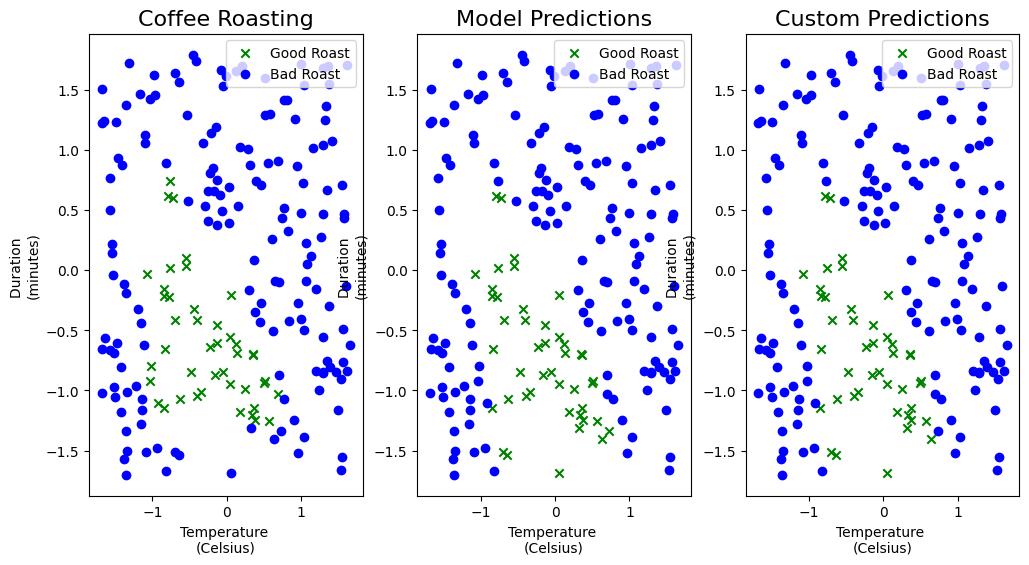

In [11]:
def plt_roast_output(X,Y, Y_PRED, CUSTOM_Y_PRED):
    Y = Y.reshape(-1,)
    Y_PRED = Y_PRED.reshape(-1,)
    fig, ax = plt.subplots(1, 3, figsize=(12, 6))
    ax[0].scatter(X[Y==1,0],X[Y==1,1], marker='x', c='g', label="Good Roast" )
    ax[0].scatter(X[Y==0,0],X[Y==0,1], marker='o', c='b', label="Bad Roast")
    ax[0].set_title(f"Coffee Roasting", size=16)
    ax[0].set_xlabel("Temperature \n(Celsius)")
    ax[0].set_ylabel("Duration \n(minutes)")
    ax[0].legend(loc='upper right')

    ax[1].scatter(X[Y_PRED==1,0],X[Y_PRED==1,1], marker='x', c='g', label="Good Roast" )
    ax[1].scatter(X[Y_PRED==0,0],X[Y_PRED==0,1], marker='o', c='b', label="Bad Roast")
    ax[1].set_title(f"Model Predictions", size=16)
    ax[1].set_xlabel("Temperature \n(Celsius)")
    ax[1].set_ylabel("Duration \n(minutes)")
    ax[1].legend(loc='upper right')

    ax[2].scatter(X[CUSTOM_Y_PRED==1,0],X[CUSTOM_Y_PRED==1,1], marker='x', c='g', label="Good Roast" )
    ax[2].scatter(X[CUSTOM_Y_PRED==0,0],X[CUSTOM_Y_PRED==0,1], marker='o', c='b', label="Bad Roast")
    ax[2].set_title(f"Custom Predictions", size=16)
    ax[2].set_xlabel("Temperature \n(Celsius)")
    ax[2].set_ylabel("Duration \n(minutes)")
    ax[2].legend(loc='upper right')
    plt.show()

plt_roast_output(X, y, y_pred, custom_y_pred)

## Recognize handwritten digits 0 and 1

We will use a neural network to recognize two handwritten digits, zero and one. This is a binary classification task. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. You will extend this network to recognize all 10 digits

In [12]:
X, y = load_digits_data()

In [13]:
def show_digits_input(X, y, y_pred=None):
    m, n = X.shape
    

    fig, axes = plt.subplots(8, 8, figsize=(8,8))
    fig.tight_layout(pad=0.1)

    for i,ax in enumerate(axes.flat):
        # Select random indices
        random_index = np.random.randint(m)
        
        # Select rows corresponding to the random indices and
        # reshape the image
        X_random_reshaped = X[random_index].reshape((20,20)).T
        
        # Display the image
        ax.imshow(X_random_reshaped, cmap='gray')
        
        # Display the label above the image
        ax.set_title(y[random_index,0] if type(y_pred) == type(None) else f"{y[random_index,0]}, {y_pred[random_index,0]}")
        ax.set_axis_off()

In [14]:
digits_model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(25, activation='sigmoid', name = 'layer1'),
        Dense(15, activation='sigmoid', name = 'layer2'),
        Dense(1, activation='sigmoid', name = 'layer3')
    ]
)

digits_model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

digits_model.fit(X,y,epochs=20)

Epoch 1/20
32/32 [==============================] - 1s 901us/step - loss: 0.2451
Epoch 2/20
32/32 [==============================] - 0s 850us/step - loss: 0.0299
Epoch 3/20
32/32 [==============================] - 0s 933us/step - loss: 0.0152
Epoch 4/20
32/32 [==============================] - 0s 965us/step - loss: 0.0122
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 11/20
32/32 [==============================] - 0s 869us/step - loss: 0.0018
Epoch 12/20
32/32 [==============================] - 0s 836us/step - loss: 0.0015
Epoch 13/20
32/32 [==================

In [15]:
y_pred = custom_round(digits_model.predict(X))

32/32 [==============================] - 0s 726us/step


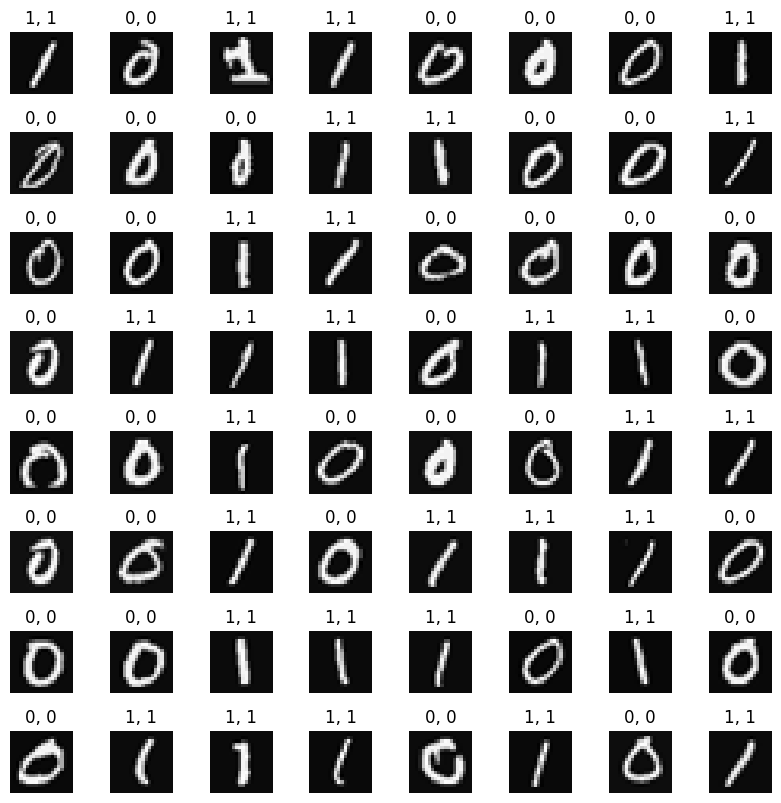

In [16]:
show_digits_input(X, y, y_pred=y_pred)

### Activation Functions

- **Linear or No activation**
$$f(x) = wx + b$$

- **Sigmoid**
$$g(z) = \frac{1}{1 + e^{-(wx + b)}}$$

- **ReLU or Rectified Linear Unit**
$$relu(z) = max(0, \frac{1}{1 + e^{-(wx + b)}})$$

- **Softmax** 
> Output is a vector and will be covered in next section
$$softmaz(z) =
\frac{1}{ \sum_{k=1}^{N}{e^{z_k} }}
\begin{bmatrix}
e^{z_1} \\
\vdots \\
e^{z_{N}} \\
\end{bmatrix} $$

In [17]:
def linear_func(X, w, b):
    return np.dot(X, w) + b

def sigmoid_func(X, w, b):
    z = linear_func(X, w, b)
    sig = 1 / (1 + np.exp(-1 * z))
    return sig

def relu_func(X, w, b):
    z = linear_func(X, w, b)
    for ind, item in enumerate(z):
        z[ind] = max(0, item)
    return z

Text(0.5, 1.0, 'ReLU')

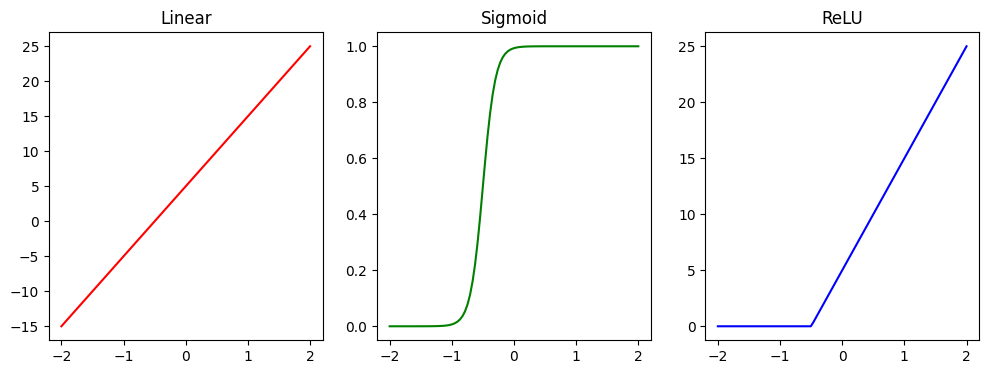

In [18]:
X = np.linspace(-2, 2, num=100).reshape(-1, 1)
W = np.array([10])
b = 5

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].plot(X, linear_func(X, W, b), color='r')
ax[0].set_title("Linear")
ax[1].plot(X, sigmoid_func(X, W, b), color='g')
ax[1].set_title("Sigmoid")
ax[2].plot(X, relu_func(X, W, b), color='b')
ax[2].set_title("ReLU")

### Choosing activation function

**Hidden Layer**
- **ReLU** is by far the most common choice to be used in the neurons for all the hidden layers

**Output Layer**
- In case of Binary classification i.e. output can either be 1 or 0 then **sigmoid** function is mostly used
- In case of multi-class classification **softmax** function can be used
- In case of Regression problems where the output can be any number then **linear** activation function is used
- In case of Regression problems where output can only be non negative values then **relu** activation function can be used

> ReLU is used instead of sigmoid function in the hidden layers mostly because of two reason, 
> (i) It is faster as it does not have to compute the sigmoid
> (ii) ReLU is flat at one end but Sigmoid is flat at two ends in the graph which makes the gradient descent algorithm slower. Therefor ReLU enables faster learning for models

**Implementation**
```
model = Sequential(
    [
        Dense(units=25, activation='relu'),
        Dense(units=15, activation='relu'),
        Dense(units=1, activation='sigmoid')
    ]
)
```

### Why do we need any activation function?

If we use no activation function or just the linear function then the resultant output will be equivalent to a linear regression model

Let's assume a neural network with 2 layers each with one neuron and takes input feature X and linear activation function i.e. g(z) = z

$$X = a^{[0]} \tag{1} $$
$$a^{[1]} = g(z) = g(w^{[1]}.a^{[0]} + b^{[1]}) = w^{[1]}.a^{[0]} + b^{[1]} \tag{2} $$
$$a^{[2]} = g(z) = g(w^{[2]}.a^{[1]} + b^{[2]}) = w^{[2]}.a^{[1]} + b^{[2]} \tag{3} $$

Substituting equation 2 in 3

$$a^{[2]} = w^{[2]}.(w^{[1]}.a^{[0]} + b^{[1]}) + b^{[2]}$$
$$a^{[2]} = w^{[2]}.w^{[1]}.a^{[0]} +  w^{[2]}.b^{[1]} + b^{[2]}$$
$$a^{[2]} = (w^{[2]}.w^{[1]}).a^{[0]} +  (w^{[2]}.b^{[1]} + b^{[2]})$$

Taking, $(w^{[2]}.w^{[1]})$ as w and $(w^{[2]}.b^{[1]} + b^{[2]})$ as b

$$a^{[2]} = w.a^{[0]} +  b \tag{4}$$

Looking at equation 4 which is our model prediction we can conclude that final output will also be a linear regression function. This is why having multiple layers in a neural network doesn't let the neural network compute any more complex features or learn anything more complex than just a linear function.

### ADAM Optimizer Algorithm

<img align="left" src="./images/neural_network/adam_optimizer_intuition.jpg" style="width: 60%; padding-right: 40px">

ADAM stands for Adaptive Moment Estimation in which the algorithm automatically updates the learning rate depending upon how the gradient descent algorithm is proceeding (basically how the cost changes w.r.t. weights).

**Intuition**

-  If the weights keep on moving in roughly the same direction then the learning rate for that parameter is increased to go faster in that direction
- If a parameter keeps oscillating back and forth then in order to prevent it from oscillating or bouncing back and forth learning rate is reduced thus reducing the change in weights

<br />

**Implementation**

```
model.compile(
    loss = ..., # loss function used in algorithm
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), # Optimizer needs an initial learning rate to start
)
```
